## Table of Contents

* [Tableau Supported Map Data](#Tableau-Supported-Map-Data)
* [World Bank Climate Data](#World-Bank-Climate-Data)
* [Scrapped World Bank Temperature Data](#Scrapped-World-Bank-Temperature-Data)
* [Intersecting the Country Codes](#Intersecting-the-Country-Codes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles # need pip install matplotlib_venn
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os
import missingno as msno
from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings("ignore")

## Tableau Supported Map Data

[About Tableau Maps](https://www.tableau.com/mapdata?_ga=2.28389562.701025511.1644926306-701361297.1641624970#data)

In [2]:
url = "https://www.tableau.com/mapdata?_ga=2.28389562.701025511.1644926306-701361297.1641624970#data"

html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

In [3]:
main_content = soup.find("div", attrs={"id": "main_content"})
h5_contents = main_content.find_all("h5")

In [4]:
supported_country_names = []
supported_country_codes = []

for h5 in h5_contents:
    country_name_and_code = h5.contents[0]
    
    country_name = country_name_and_code[:-6]
    country_code = country_name_and_code[-4:-1]
    
    supported_country_names.append(country_name)
    supported_country_codes.append(country_code)

In [5]:
print(len(supported_country_codes), "Tableau supported country codes")
print(supported_country_codes)

250 Tableau supported country codes
['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COK', 'CRI', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'CIV', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FSM', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ

## World Bank Climate Data

In [6]:
# worldbank imputed data
df_worldbank = pd.read_csv('output/worldbank_imputed.csv')

# worldbank country codebook
meta_country = pd.read_csv('dataset/worldbank/Metadata_Country_API_19_DS2_en_csv_v2_3159902.csv')

worldbank_country_codes = []
worldbank_country_names = df_worldbank['Country Name'].unique().tolist()

for country in worldbank_country_names:
    try:
        code = meta_country.loc[meta_country['TableName'] == country].iloc[0]['Country Code']
        worldbank_country_codes.append(code)
    except IndexError:
        print(country)

Cote d'Ivoire
Sao Tome and Principe
East Asia & Pacific (IDA & IBRD countries)
Europe & Central Asia (IDA & IBRD countries)
Latin America & the Caribbean (IDA & IBRD countries)
Middle East & North Africa (IDA & IBRD countries)
Sub-Saharan Africa (IDA & IBRD countries)


Cote d'Ivoire (CIV) and Sao Tome and Principe (STP) are spelled differently in Worldbank data and its codebook.

| Worldbank data        | Codebook              |
| --------------------- | --------------------- |
| Cote d'Ivoire         | Côte d'Ivoire         |
| Sao Tome and Principe | São Tomé and Principe |



In [7]:
display(meta_country.loc[meta_country['Country Code'] == 'CIV'])
display(meta_country.loc[meta_country['Country Code'] == 'STP'])

Country Code              Region          IncomeGroup SpecialNotes  \
41          CIV  Sub-Saharan Africa  Lower middle income          NaN   

        TableName  Unnamed: 5  
41  Côte d'Ivoire         NaN

Country Code              Region          IncomeGroup  \
218          STP  Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes              TableName  \
218  National account data were adjusted to reflect...  São Tomé and Principe   

     Unnamed: 5  
218         NaN

Therefore we add `CIV` and `STP` into the list.

In [8]:
worldbank_country_codes.append('CIV')
worldbank_country_codes.append('STP')

In [9]:
print(len(worldbank_country_codes), "country codes")
print(worldbank_country_codes)

250 country codes
['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE', 'CHL', 'CHN', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LKA', 'LMC', 'LMY', 'LSO', 'LTE', 'LTU', 'LUX', '

## Scrapped World Bank Temperature Data 

In [10]:
path = "dataset/data_scraping/data/"
data_list = os.listdir(path)
data_list

['tas_timeseries_annual_cru_1901-2020_ABW.csv',
 'tas_timeseries_annual_cru_1901-2020_AFG.csv',
 'tas_timeseries_annual_cru_1901-2020_AGO.csv',
 'tas_timeseries_annual_cru_1901-2020_AIA.csv',
 'tas_timeseries_annual_cru_1901-2020_ALB.csv',
 'tas_timeseries_annual_cru_1901-2020_AND.csv',
 'tas_timeseries_annual_cru_1901-2020_ARE.csv',
 'tas_timeseries_annual_cru_1901-2020_ARG.csv',
 'tas_timeseries_annual_cru_1901-2020_ARM.csv',
 'tas_timeseries_annual_cru_1901-2020_ASM.csv',
 'tas_timeseries_annual_cru_1901-2020_ATG.csv',
 'tas_timeseries_annual_cru_1901-2020_AUS.csv',
 'tas_timeseries_annual_cru_1901-2020_AUT.csv',
 'tas_timeseries_annual_cru_1901-2020_AZE.csv',
 'tas_timeseries_annual_cru_1901-2020_BDI.csv',
 'tas_timeseries_annual_cru_1901-2020_BEL.csv',
 'tas_timeseries_annual_cru_1901-2020_BEN.csv',
 'tas_timeseries_annual_cru_1901-2020_BFA.csv',
 'tas_timeseries_annual_cru_1901-2020_BGD.csv',
 'tas_timeseries_annual_cru_1901-2020_BGR.csv',
 'tas_timeseries_annual_cru_1901-2020_BH

In [11]:
len(data_list)

228

In [12]:
scrapped_country_codes = [filename[-7:-4] for filename in data_list]
print(len(scrapped_country_codes), "country codes")
print(scrapped_country_codes)

228 country codes
['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BTN', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP', 'MOZ', 'MRT', 'MSR', '

## Intersecting the Country Codes

Now we have 3 lists of country codes:

* `supported_country_codes`: List of country codes supported by Tableau
* `worldbank_country_codes`: List of country codes from our imputed World Bank climate data
* `scrapped_country_codes`: List of country codes from our scrapped World Bank temperature data

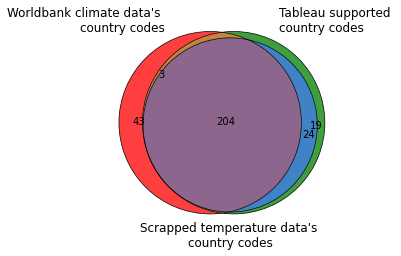

In [13]:
v = venn3([set(worldbank_country_codes), set(supported_country_codes), set(scrapped_country_codes)],
     set_labels = ("Worldbank climate data's \ncountry codes", 
                   "Tableau supported \ncountry codes",
                   "Scrapped temperature data's \ncountry codes"),
     alpha = 0.75)

# adds outter line
venn3_circles([set(worldbank_country_codes), set(supported_country_codes), set(scrapped_country_codes)], lw=0.7)

plt.show()

In [14]:
# intersecting the three lists
available_country_codes = list(set(worldbank_country_codes) & set(supported_country_codes) & set(scrapped_country_codes))
print(len(available_country_codes), "available country codes")
print(available_country_codes)

204 available country codes
['MDG', 'COL', 'AUT', 'IND', 'PHL', 'MEX', 'ECU', 'BLZ', 'SAU', 'PLW', 'MMR', 'SLE', 'LSO', 'CUB', 'AZE', 'MHL', 'URY', 'NOR', 'DEU', 'TLS', 'PRK', 'LBN', 'ARE', 'COD', 'MOZ', 'TJK', 'GMB', 'IRQ', 'STP', 'JPN', 'EGY', 'MRT', 'TCA', 'DMA', 'MLI', 'GRC', 'NPL', 'GIN', 'CIV', 'PSE', 'GUY', 'PAN', 'GEO', 'FSM', 'NER', 'SLB', 'KIR', 'LVA', 'VCT', 'MNG', 'ISL', 'LTU', 'NAM', 'PAK', 'GNB', 'RWA', 'SVN', 'LBY', 'TZA', 'UGA', 'ZAF', 'HND', 'HUN', 'BRA', 'BLR', 'PYF', 'MDV', 'KOR', 'AGO', 'UKR', 'ROU', 'CPV', 'AND', 'IRN', 'CAF', 'EST', 'BHS', 'SOM', 'SUR', 'DOM', 'ETH', 'NIC', 'KAZ', 'BGD', 'MKD', 'BDI', 'CYP', 'ARG', 'IDN', 'SWE', 'HRV', 'MYS', 'SRB', 'CHN', 'LCA', 'SLV', 'FRO', 'GAB', 'NGA', 'YEM', 'AFG', 'FIN', 'BEL', 'ATG', 'BIH', 'UZB', 'ABW', 'TKM', 'ZWE', 'VUT', 'TCD', 'COM', 'LIE', 'PER', 'TUN', 'ZMB', 'ITA', 'BTN', 'BFA', 'ERI', 'GUM', 'TGO', 'CMR', 'GNQ', 'GBR', 'AUS', 'GTM', 'TUV', 'BHR', 'JOR', 'VNM', 'NCL', 'BOL', 'FRA', 'ISR', 'THA', 'BEN', 'ASM', 'MLT'

<span style="color:red">Ignore this for now</span>

## GitHub Country Codes

Available on [GitHub](https://gist.github.com/tadast/8827699)

In [15]:
df_country_codes = pd.read_csv('dataset/countries_codes_and_coordinates.csv')

In [16]:
df_country_codes

Country Alpha-2 code Alpha-3 code Numeric code  \
0          Afghanistan         "AF"        "AFG"          "4"   
1              Albania         "AL"        "ALB"          "8"   
2              Algeria         "DZ"        "DZA"         "12"   
3       American Samoa         "AS"        "ASM"         "16"   
4              Andorra         "AD"        "AND"         "20"   
..                 ...          ...          ...          ...   
251  Wallis and Futuna         "WF"        "WLF"        "876"   
252     Western Sahara         "EH"        "ESH"        "732"   
253              Yemen         "YE"        "YEM"        "887"   
254             Zambia         "ZM"        "ZMB"        "894"   
255           Zimbabwe         "ZW"        "ZWE"        "716"   

    Latitude (average) Longitude (average)  
0                 "33"                "65"  
1                 "41"                "20"  
2                 "28"                 "3"  
3           "-14.3333"              "-170"  
4               "42.5"               "1.6"  
..                 ...                 ...  
251            "-13.3"            "-176.2"  
252             "24.5"               "-13"  
253               "15"                "48"  
254              "-15"                "30"  
255              "-20"                "30"  

[256 rows x 6 columns]

In [17]:
columns = ['Alpha-2 code', 'Alpha-3 code', 'Numeric code', 'Latitude (average)', 'Longitude (average)']

for column in columns:
    df_country_codes[column] = df_country_codes[column].str.replace('"', '')
    df_country_codes[column] = df_country_codes[column].str.replace(' ', '')
    
df_country_codes['Numeric code'] = df_country_codes['Numeric code'].astype('int')
df_country_codes['Latitude (average)'] = df_country_codes['Latitude (average)'].astype('float')
df_country_codes['Longitude (average)'] = df_country_codes['Longitude (average)'].astype('float')
df_country_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              256 non-null    object 
 1   Alpha-2 code         256 non-null    object 
 2   Alpha-3 code         256 non-null    object 
 3   Numeric code         256 non-null    int32  
 4   Latitude (average)   256 non-null    float64
 5   Longitude (average)  256 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 11.1+ KB


In [18]:
country_codes = df_country_codes['Alpha-3 code'].unique().tolist()
print(len(country_codes), "country codes")
print(country_codes)

244 country codes
['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', '